In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [4]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
class_name = ['not spam', 'spam']
label_to_class = {
    0: 'not spam',
    1:'spam'
}
class_to_label = {
    value: key
    for key, value in label_to_class.items()
}

print(x, x.shape)
print(y, y.shape)
print('target:', [label_to_class[i] for i in y])
print(label_to_class)
print(class_to_label)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)
[0 0 0 0 1 1 1 1 1 1] (10,)
target: ['not spam', 'not spam', 'not spam', 'not spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']
{0: 'not spam', 1: 'spam'}
{'not spam': 0, 'spam': 1}


In [5]:
#define model
model = LogisticRegression(solver='liblinear', random_state=11)
model

LogisticRegression(random_state=11, solver='liblinear')

In [6]:
model.fit(x,y)

LogisticRegression(random_state=11, solver='liblinear')

In [7]:
print('classes:', model.classes_)
print('weight:', model.coef_)
print('bias:', model.intercept_)
print('n iteration:', model.n_iter_)

classes: [0 1]
weight: [[0.51491375]]
bias: [-1.04608067]
n iteration: [6]


In [10]:
#probability masuk ke kelas 0 ato 1
model.predict_proba(x) 

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
prediction = model.predict(x)
print('prediction:', prediction)
print('target:', y)

prediction: [0 0 0 1 1 1 1 1 1 1]
target: [0 0 0 0 1 1 1 1 1 1]


In [13]:
#accuracy
model_score = model.score(x,y)
print('score:', model_score) #3+6/10=0.9

score: 0.9


In [14]:
confusion_matrix(y, prediction)
#tn-fp
#fn-tp

array([[3, 1],
       [0, 6]], dtype=int64)

In [15]:
#precision = tp/(tp+fp)
#recall/sensitivity= tp/(fn+tp)
#specifity=tn/(tn+fp)

In [16]:
#ex: fraud detection --> classification

In [17]:
#tp 30, tn 40, fp 5, fn 25
#accuracy = 30+40/100=0.7
#precision = 30/35
#recall = 30/25+30 = 30/55

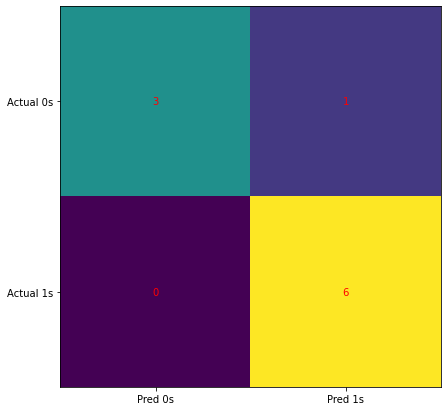

In [20]:
cm = confusion_matrix(y, prediction)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Pred 0s', 'Pred 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [21]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [22]:
#C regularization, makin gede nilai C membuat model makin akurat

In [26]:
X, y = load_digits(return_X_y=True)

In [27]:
print('dataset shape:', X.shape)
print('target shape:', y.shape)

dataset shape: (1797, 64)
target shape: (1797,)


In [29]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [30]:
print(y)

[0 1 2 ... 8 9 8]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

print('training set shape:', X_train.shape)
print('test set shape:', X_test.shape)

training set shape: (1437, 64)
test set shape: (360, 64)


In [32]:
print('before scaling data:')
print(X_train[:5])
print(X_test[:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

print('after scaling data:')
print(X_train[:5])
print(X_test[:5])

before scaling data:
[[ 0.  0.  3. 15. 16. 16. 12.  0.  0.  0. 12. 12.  7. 16.  6.  0.  0.  4.
  12.  0.  9. 13.  0.  0.  0.  0.  1.  1. 13.  7.  0.  0.  0.  0.  8. 13.
  16. 16.  6.  0.  0.  0. 12. 15. 12.  6.  1.  0.  0.  0.  0. 15.  5.  0.
   0.  0.  0.  0.  3. 16.  2.  0.  0.  0.]
 [ 0.  2.  9. 11. 12. 15.  6.  0.  0.  6. 16.  9.  8.  8.  1.  0.  0.  4.
  13.  0.  0.  0.  0.  0.  0.  4. 16. 12. 11.  5.  0.  0.  0.  1.  5.  4.
   8. 14.  5.  0.  0.  0.  0.  0.  0.  8.  8.  0.  0.  1.  6.  4.  5. 15.
   3.  0.  0.  3. 16. 16. 16.  8.  0.  0.]
 [ 0.  0.  6. 12. 16. 10.  0.  0.  0.  4. 15.  8. 12. 14.  0.  0.  0.  0.
   0.  0. 13.  8.  0.  0.  0.  0.  0.  6. 14.  1.  0.  0.  0.  0.  0.  5.
  15.  8.  0.  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.  0.  1.  4.  5. 15.
   8.  0.  0.  0.  5. 16. 14.  9.  1.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.  0.  2. 16. 14. 14. 14.  0.  0.  0.  2.
  14.  4. 14. 10.  0.  0.  0.  0.  0.  8. 16.  8.  0.  0.  0.  0.  0.  0.
   8. 16.  6.  0.  0.  0.  0.  0.  0

In [33]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=111)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=111,
                   solver='liblinear')

In [35]:
print('--training set performance--')
train_pred = model.predict(X_train)
print(classification_report(y_train, train_pred))

print('--test set performance')
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

--training set performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       0.93      0.97      0.95       143
           2       0.97      1.00      0.99       145
           3       0.99      0.97      0.98       148
           4       1.00      0.98      0.99       143
           5       0.97      0.98      0.97       147
           6       0.99      0.99      0.99       143
           7       0.97      0.99      0.98       141
           8       0.95      0.89      0.92       138
           9       0.93      0.93      0.93       147

    accuracy                           0.97      1437
   macro avg       0.97      0.97      0.97      1437
weighted avg       0.97      0.97      0.97      1437

--test set performance
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.82      0.85      0.84        39
           2       1.00   

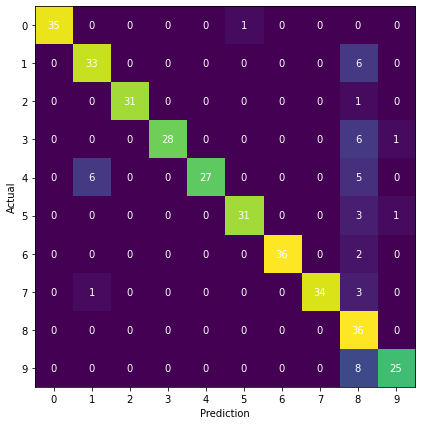

In [37]:
cm = confusion_matrix(y_test, test_pred)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Prediction', color='black')
ax.set_ylabel('Actual', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
plt.show()

In [39]:
model.coef_.shape

(10, 64)

In [42]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
print(len(weather))

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
print(len(temp))

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
print(len(play))

14
14
14


In [41]:
#https://ardhiraka.com/ptp/intro/notebook/s13.html

In [44]:
encoder = LabelEncoder()
enc_weather = encoder.fit_transform(weather)
print(enc_weather)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [45]:
enc_temp = encoder.fit_transform(temp)
print(enc_temp)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [46]:
features = list(zip(enc_weather, enc_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [48]:
label = encoder.fit_transform(play)

In [53]:
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [49]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)


KNeighborsClassifier(n_neighbors=3)

In [52]:
print(model.predict([[0,2]]))

[1]


In [59]:
wine = load_wine()

In [61]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=111
)

print('training set shape:', X_train.shape)
print('test set shape:', X_test.shape)

training set shape: (124, 13)
test set shape: (54, 13)


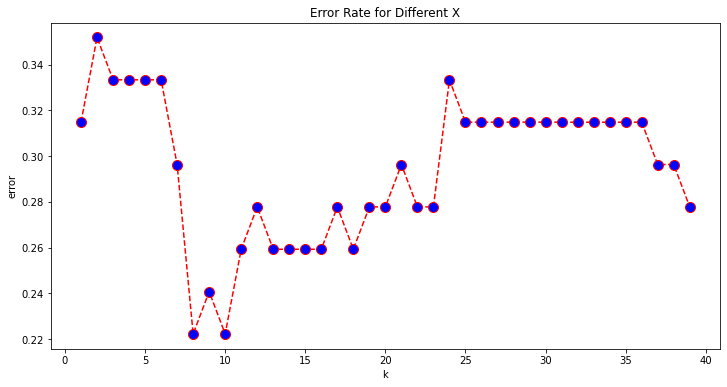

7


In [69]:
error = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err = np.mean(pred != y_test)
    error.append(err)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='r', linestyle='dashed',
        marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate for Different X')
plt.xlabel('k')
plt.ylabel('error')
plt.show()

print(np.argmin(error))

In [70]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.74      0.77      0.76        22
           2       0.64      0.60      0.62        15

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54

